# Cut video into frames

In [1]:
import os
import pandas as pd
import numpy as np

folder_path ='E:/NUS/5003/video'  # 替换成你的文件夹路径

# 确保文件夹存在
if os.path.exists(folder_path) and os.path.isdir(folder_path):
    # 获取文件夹中所有文件的名称
    file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]


In [17]:
from moviepy.video.io.VideoFileClip import VideoFileClip
import imageio

def split_video_into_frames(video_path, output_folder, frame_rate):
    # 打开视频文件
    video_clip = VideoFileClip(video_path)

    # 计算每帧的时间间隔
    frame_interval = 1 / frame_rate

    # 循环处理每帧
    for i, frame in enumerate(video_clip.iter_frames(fps=frame_rate, dtype='uint8')):
        # 创建图像文件名
        image_filename = f"{output_folder}/frame_{i:04d}.png"

        # 保存当前帧为图像文件
        video_clip.save_frame(image_filename, t=i * frame_interval)

    # 关闭视频文件
    video_clip.reader.close()

# 设置输入视频路径、输出文件夹和帧率
for file in file_names:
    print('processing:%s'%file)
    
    input_video_path = 'E:/NUS/5003/video/%s'%file
    if os.path.exists('E:/NUS/5003/frames/%s'%file) and os.path.isdir('E:/NUS/5003/frames/%s'%file):
        os.rmdir('E:/NUS/5003/frames/%s'%file)
        
    os.mkdir('E:/NUS/5003/frames/%s'%file)
    output_folder = 'E:/NUS/5003/frames/%s'%file
    frame_rate = 120

# 调用函数进行切割
    split_video_into_frames(input_video_path, output_folder, frame_rate)

processing:AR Gait_P_H016_Free walk_25-11-2022_15-21-44_noAR.o.mp4
processing:AR Gait_P_H016_Free walk_25-11-2022_15-22-02_noAR.o.mp4
processing:AR Gait_P_H016_Free walk_25-11-2022_15-22-20_noAR.o.mp4
processing:AR Gait_P_H016_Free walk_25-11-2022_15-22-38_noAR.o.mp4
processing:AR Gait_P_H016_Free walk_25-11-2022_15-22-55_noAR.o.mp4
processing:AR Gait_P_H017_Free walk_30-11-2022_15-29-34_noAR.o.mp4
processing:AR Gait_P_H017_Free walk_30-11-2022_15-29-54_noAR.o.mp4
processing:AR Gait_P_H017_Free walk_30-11-2022_15-30-14_noAR.o.mp4
processing:AR Gait_P_H017_Free walk_30-11-2022_15-30-35_noAR.o.mp4
processing:AR Gait_P_H017_Free walk_30-11-2022_15-30-55_noAR.o.mp4
processing:AR Gait_P_H018_Free walk_30-11-2022_16-06-07_noAR.o.mp4
processing:AR Gait_P_H018_Free walk_30-11-2022_16-06-24_noAR.o.mp4
processing:AR Gait_P_H018_Free walk_30-11-2022_16-06-40_noAR.o.mp4
processing:AR Gait_P_H018_Free walk_30-11-2022_16-06-55_noAR.o.mp4
processing:AR Gait_P_H018_Free walk_30-11-2022_16-07-10_noAR.o

# MATCH frame by .csv file

In [1]:
import pandas as pd
import csv
import os
import numpy as np
import shutil

In [6]:
frame_folder = os.listdir('E:/NUS/5003/frames')
coord_folder = os.listdir('E:/NUS/5003/HSTO_coord')
frame_folder_name = [folder.split('.')[0] for folder in frame_folder]
coord_folder_name = [folder.split('.')[0] for folder in coord_folder]
matching_name = [element for element in frame_folder_name if element in coord_folder_name]
for file_name in matching_name:
    #print((file_name))
    #filename = file_name+'.pkl.csv'
    df = pd.read_csv('E:/NUS/5003/HSTO_coord/'+file_name+'.pkl.csv')
    HS_frame = df.iloc[:,0]
    TO_frame = df.iloc[:,6]
    HS_str_frame_num = [str(num).zfill(4) for num in HS_frame]
    TO_str_frame_num = [str(num).zfill(4) for num in TO_frame]
    print(HS_str_frame_num)
    frame_subfolder =  'E:/NUS/5003/frames/'+file_name+'.o.mp4'
    #print('frame_%s.png'%HS_str_frame_num[0])
    for ele in HS_str_frame_num:
        print(ele)
        if ('frame_%s.png'%ele in os.listdir(frame_subfolder)):
            copied_frame_path = 'frame_%s.png'%ele
            print(copied_frame_path)
              # +'/%s'%copied_frame_path
            #print('frame_%s.png'%HS_str_frame_num)
            if not os.path.exists('E:/NUS/5003/HS_frames/'+file_name+'.o.mp4'):
                os.makedirs('E:/NUS/5003/HS_frames/'+file_name+'.o.mp4')
            destination_filepath = 'E:/NUS/5003/HS_frames/'+file_name+'.o.mp4'+'/frame_%s.png'%ele
            shutil.copyfile( 'E:/NUS/5003/frames/'+file_name+'.o.mp4'+'/%s'%copied_frame_path, destination_filepath)
    

['0145', '0270', '0391', '0517', '0072', '0209', '0332', '0454', '0580']
0145
frame_0145.png
0270
frame_0270.png
0391
frame_0391.png
0517
frame_0517.png
0072
frame_0072.png
0209
frame_0209.png
0332
frame_0332.png
0454
frame_0454.png
0580
frame_0580.png
['0149', '0275', '0402', '0529', '0657', '0073', '0214', '0337', '0464', '0591']
0149
frame_0149.png
0275
frame_0275.png
0402
frame_0402.png
0529
frame_0529.png
0657
frame_0657.png
0073
frame_0073.png
0214
frame_0214.png
0337
frame_0337.png
0464
frame_0464.png
0591
frame_0591.png
['0149', '0280', '0408', '0537', '0669', '0076', '0217', '0344', '0469', '0601', '0732']
0149
frame_0149.png
0280
frame_0280.png
0408
frame_0408.png
0537
frame_0537.png
0669
frame_0669.png
0076
frame_0076.png
0217
frame_0217.png
0344
frame_0344.png
0469
frame_0469.png
0601
frame_0601.png
0732
frame_0732.png
['0128', '0257', '0387', '0517', '0057', '0195', '0322', '0450', '0578']
0128
frame_0128.png
0257
frame_0257.png
0387
frame_0387.png
0517
frame_0517.png
0057

In [7]:
for file_name in matching_name:
    #print((file_name))
    #filename = file_name+'.pkl.csv'
    df = pd.read_csv('E:/NUS/5003/HSTO_coord/'+file_name+'.pkl.csv')
    HS_frame = df.iloc[:,0]
    TO_frame = df.iloc[:,6]
    HS_str_frame_num = [str(num).zfill(4) for num in HS_frame]
    TO_str_frame_num = [str(num).zfill(4) for num in TO_frame]
    print(HS_str_frame_num)
    frame_subfolder =  'E:/NUS/5003/frames/'+file_name+'.o.mp4'
    #print('frame_%s.png'%HS_str_frame_num[0])
    for ele in TO_str_frame_num:
        print(ele)
        if ('frame_%s.png'%ele in os.listdir(frame_subfolder)):
            copied_frame_path = 'frame_%s.png'%ele
            print(copied_frame_path)
              # +'/%s'%copied_frame_path
            #print('frame_%s.png'%HS_str_frame_num)
            if not os.path.exists('E:/NUS/5003/TO_frames/'+file_name+'.o.mp4'):
                os.makedirs('E:/NUS/5003/TO_frames/'+file_name+'.o.mp4')
            destination_filepath = 'E:/NUS/5003/TO_frames/'+file_name+'.o.mp4'+'/frame_%s.png'%ele
            shutil.copyfile( 'E:/NUS/5003/frames/'+file_name+'.o.mp4'+'/%s'%copied_frame_path, destination_filepath)
    

['0145', '0270', '0391', '0517', '0072', '0209', '0332', '0454', '0580']
0099
frame_0099.png
0224
frame_0224.png
0350
frame_0350.png
0475
frame_0475.png
0602
frame_0602.png
0166
frame_0166.png
0287
frame_0287.png
0409
frame_0409.png
0533
frame_0533.png
['0149', '0275', '0402', '0529', '0657', '0073', '0214', '0337', '0464', '0591']
0104
frame_0104.png
0224
frame_0224.png
0358
frame_0358.png
0484
frame_0484.png
0613
frame_0613.png
0170
frame_0170.png
0294
frame_0294.png
0419
frame_0419.png
0545
frame_0545.png
0681
frame_0681.png
['0149', '0280', '0408', '0537', '0669', '0076', '0217', '0344', '0469', '0601', '0732']
105.0
229.0
365.0
493.0
622.0
172.0
299.0
426.0
554.0
687.0
0nan
['0128', '0257', '0387', '0517', '0057', '0195', '0322', '0450', '0578']
0083
frame_0083.png
0207
frame_0207.png
0342
frame_0342.png
0473
frame_0473.png
0603
frame_0603.png
0151
frame_0151.png
0277
frame_0277.png
0405
frame_0405.png
0533
frame_0533.png
['0122', '0252', '0380', '0509', '0047', '0189', '0316', '0

# FRAME ANALYSIS

## A. recognition of the floor

By color

In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
image_path = os.getcwd()+'/frame_0149.png'

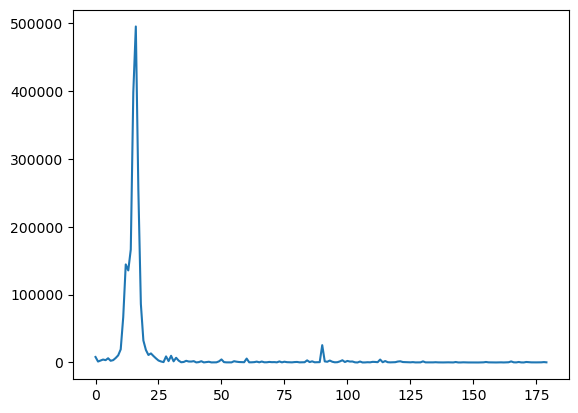

In [2]:
image = cv2.imread(image_path)
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
hist = cv2.calcHist([hsv_image], [0], None, [180], [0, 180])  # show how color distribute
plt.plot(hist)
plt.show()

In [32]:
def extract_floor(image_path):
    # 读取图像
    image = cv2.imread(image_path)

    # 将图像从BGR色彩空间转换为HSV色彩空间
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # 定义地板颜色的HSV范围
    lower_bound = np.array([15, 56, 179] ) # 低阈值  [11, 43, 46]
    upper_bound = np.array([25, 255, 255])  # 高阈值 [25, 255, 255]

    # 创建掩码，其中在阈值范围内的部分将为白色（255），其他部分为黑色（0）
    mask = cv2.inRange(hsv_image, lower_bound, upper_bound)

    # 在原始图像上应用掩码
    result = cv2.bitwise_and(image, image, mask=mask)

    # 显示原始图像和结果图像
    resized_image = cv2.resize(image, (270, 480)) # picture 9:16
    resized_result = cv2.resize(result, (270, 480))
    cv2.imshow('original_image',resized_image)
    cv2.imshow('result',resized_result)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# 调用函数进行颜色识别和地板提取
extract_floor(image_path)


# B. Contour extraction

In [35]:


image = cv2.imread(image_path)

# 将图像转换为灰度
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 进行阈值处理
_, thresholded = cv2.threshold(gray, 80, 222, cv2.THRESH_BINARY)

# 寻找轮廓
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 在原始图像上绘制轮廓
cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

# 显示原始图像和带有轮廓的图像

resized_image = cv2.resize(image, (270, 480)) # picture 9:16
resized_result = cv2.resize(thresholded, (360, 640))
cv2.imshow('original_image',resized_image)
cv2.imshow('contours',resized_result)
cv2.imwrite(os.getcwd()+'/contour_0217.png' ,resized_result )
cv2.waitKey(0)
cv2.destroyAllWindows()


# C. By line detection 

In [30]:
# 筛选横向的斜线
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
image_path = os.getcwd()+'/contour_0217.png'

In [31]:
threshold_value = 128
max_pixel_value = 255
image = cv2.imread(image_path)
# 使用cv2.threshold进行二值化
ret, binary_image = cv2.threshold(image, threshold_value, max_pixel_value, cv2.THRESH_BINARY)

"""
cv2.imshow("Filtered Lines", binary_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
"""

'\ncv2.imshow("Filtered Lines", binary_image)\ncv2.waitKey(0)\ncv2.destroyAllWindows()\n'

In [32]:
def filter_lines_by_slope(lines, slope_threshold):
    filtered_lines = []
    
    for line in lines:
        x1, y1, x2, y2 = line[0]
        
        # 计算直线的斜率
        if x2 - x1 != 0:
            slope = (y2 - y1) / (x2 - x1)
            
            # 根据斜率范围筛选直线
            if abs(slope) < slope_threshold:
                filtered_lines.append(line)
    
    return filtered_lines

# 读取图像并转换为灰度
#image = cv2.imread(image_path)
binary_image = cv2.resize(binary_image,(270,480))
gray = cv2.cvtColor(binary_image, cv2.COLOR_BGR2GRAY) 

# 进行边缘检测
edges = cv2.Canny(gray, 0, 255)

# 进行直线检测
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=100, maxLineGap=60)  # threshold=88

# 定义斜率阈值
slope_threshold =  100 # np.sqrt(3)/3

# 通过斜率进行筛选
filtered_lines = filter_lines_by_slope(lines, slope_threshold)

x1, y1, x2, y2 = filtered_lines[np.argmax(filtered_lines)//4][0]  
#x1, y1, x2, y2 = filtered_lines[5][0] 
print('index of floor coord',np.argmax(filtered_lines)//4)
slope_floor = (y2 - y1) / (x2 - x1)
angle_floor = np.degrees(np.arctan(slope_floor))
print('angle of the floor:',angle_floor)


"""
cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
cv2.imshow("Filtered Lines[3]", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

"""
# 在原始图像上绘制筛选后的直线
for line in filtered_lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(binary_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    print(line)

# 显示结果图像
cv2.imshow("Filtered Lines", binary_image)
cv2.waitKey(0)
cv2.destroyAllWindows()



index of floor coord 1
angle of the floor: -87.01336300952484
[[ 41 146 250 146]]
[[177 287 189  57]]
[[ 41 143 260 143]]


In [9]:
line1

In [44]:
# 假设有两条直线，line1和line2
line1 = filtered_lines[0][0]  #row
line2 = filtered_lines[1][0]  #column

# 通过直线端点计算透视变换矩阵
width = 480
height = 640

pts1 = np.float32([line1[0:2], line1[2:], line2[0:2], line2[2:]])
pts2 = np.float32([  line1[0:2], [line1[2], line1[1] ], line2[0:2], [line2[0], line2[-1]-22]  ] )

perspective_matrix = cv2.getPerspectiveTransform(pts1, pts2)

In [45]:
heel_ori_coord = [440.41345088 ,467.14132477 , 1] ## frame 537 = [729.48499261 ,691.00707793,1]
toe_ori_coord = [549.76060781 ,479.28312429, 1]  ## frame 537 = [781.56172013 ,711.19618403,1]

# frame 217 coord: heel = [440.41345088 ,467.14132477], toe =  [549.76060781 ,479.28312429]
heel_trans = heel_ori_coord@perspective_matrix
toe_trans = toe_ori_coord@perspective_matrix

np.degrees( np.arctan ( (toe_trans[1]-heel_trans[1])/ (toe_trans[0]-heel_trans[0]) )  )

21.883367516468304

In [46]:
# 应用透视变换
corrected_image = cv2.warpPerspective(image, perspective_matrix, (width, height))

# 显示矫正后的图像
cv2.imshow('Corrected Image', corrected_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
